<a href="https://colab.research.google.com/github/Arx15E/University-Proyects/blob/main/Reto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Gestión riesgo operacional – Fallas Tecnológicas y Administración de Procesos bajo Teoría de la Credibilidad**

Espacio de trabajo en el cual se plantea el análisis de los riesgos operacionales asociados tanto a las fallas tecnológicas como a la administración y ejecución de los procesos internos de la organización. Estos riesgos pueden afectar la continuidad del negocio, la eficiencia operativa y la estabilidad financiera, generando impactos económicos directos e indirectos.

Los riesgos operacionales en estos dos frentes se describen a través de dos variables aleatorias fundamentales:

Frecuencia: Indica el número de eventos de riesgo que ocurren en un periodo determinado (fallas tecnológicas o incidentes administrativos).

Severidad (KUSD): Indica el costo económico asociado a la solución de cada evento de riesgo, incluyendo reparación, reprocesos, pérdidas operativas, sanciones o impactos contractuales.


El producto entre la severidad y la frecuencia da como resultado la distribución agregada de las pérdidas bajo el enfoque LDA (Loss Distribution Approach). A partir de esta distribución se realizará su caracterización utilizando medidas de tendencia central (Media, Desviación) y medidas de dispersión (Coeficiente de simetría, Kurtosis), con el fin de evaluar la volatilidad del riesgo, la presencia de eventos extremos y el impacto financiero potencial para la organización.

Adicionalmente, se aplicará la Teoría de la Credibilidad, la cual permitirá estimar de manera más precisa las pérdidas futuras combinando la experiencia histórica propia de la organización con información colectiva o promedio general. A través del factor de credibilidad (Z), se ajustará la estimación de la pérdida esperada, reduciendo la sobreestimación por eventos atípicos y mejorando la estabilidad de las proyecciones. De esta manera, se obtendrá una estimación más robusta del riesgo operacional y del capital necesario para cubrir posibles pérdidas futuras.

0. Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. se cargan las dos base de datos correspondientes

In [ ]:
nxl='/content/drive/MyDrive/IntegraciónDatos/1. FallasTecnológicas (2) (1).xlsx'
datos=pd.read_excel(nxl,sheet_name=0)
datos.head(10)

# Skip the header row and convert to numeric type
Freq = datos.iloc[1:, 1].astype(float)
sev = datos.iloc[1:, 2].astype(float)
LDA = Freq * sev

nxle='/content/drive/MyDrive/IntegraciónDatos/2. AdmonEjecProcesos.xlsx'
datos2=pd.read_excel(nxle,sheet_name=0)
datos2.head(10)

Freqe=datos2.iloc[:,3]
seve=datos2.iloc[:,4]
LDAe=Freqe*seve

3. definimos las funcion caracterización

In [ ]:
def caracterizacion(LDA):

  #Se procede con la creación de la distribución
  plt.figure(figsize=(10,5))
  sns.histplot(LDA,bins=10,kde=True)
  plt.xlabel("Pérdida (KUSD)")
  plt.grid()
  plt.show()

  #Se procede con la caracterización de cada una de las variables
  np.set_printoptions(suppress=True)
  NI=10    #Indica el número de clusters
  counts,bin_edges=np.histogram(LDA,bins=NI)
  print("El número de datos por intervalo es:")
  print(counts)
  print("Los intervalos inferiores:")
  print(bin_edges[:-1])
  print("Los intervalos superiores:")
  print(bin_edges[1:])
  XC=(bin_edges[:-1]+bin_edges[1:])/2

  #Se configura la tabla de los datos
  Tabla=np.column_stack((bin_edges[:-1],bin_edges[1:],XC,counts))
  df=pd.DataFrame(Tabla,columns=['LI','LS','XC','ND'])
  df.head(10)

  #Se procede con la estimación de la media
  fr=counts/np.sum(counts)
  u=np.sum(XC*fr)
  sigma2=np.sum(fr*(XC-u)**2)
  sigma=np.sqrt(sigma2)
  Cas=np.sum(fr*(XC-u)**3)/sigma**3
  Kur=(np.sum(fr*(XC-u)**4)/sigma**4)-3

  return u,sigma,Cas,Kur,df

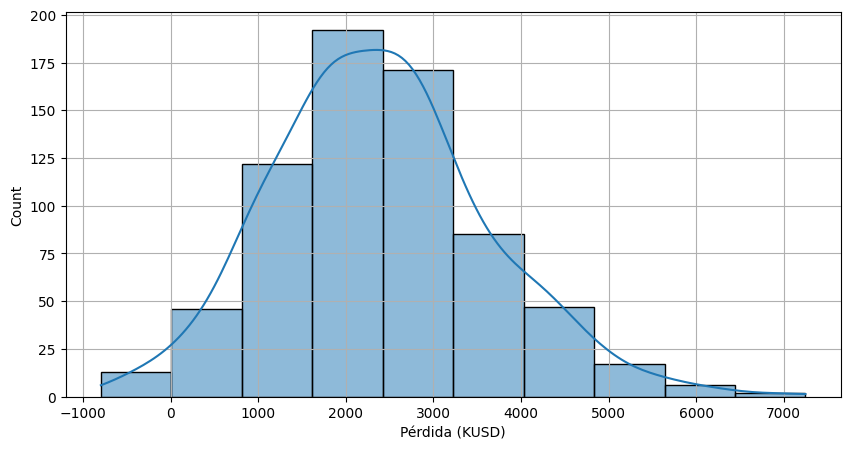

El número de datos por intervalo es:
[ 13  46 122 192 171  85  47  17   6   2]
Los intervalos inferiores:
[-796.592     7.6911  811.9742 1616.2573 2420.5404 3224.8235 4029.1066
 4833.3897 5637.6728 6441.9559]
Los intervalos superiores:
[   7.6911  811.9742 1616.2573 2420.5404 3224.8235 4029.1066 4833.3897
 5637.6728 6441.9559 7246.239 ]
La media de los datos observados es: 2407.3460267475034
El coeficiente de asimetría es:  0.3905534873601847


In [ ]:
uo,sigmao, Caso, Kuo,dfo=caracterizacion(LDA)
print("La media de los datos observados es:", uo)
print("El coeficiente de asimetría es: ", Caso)

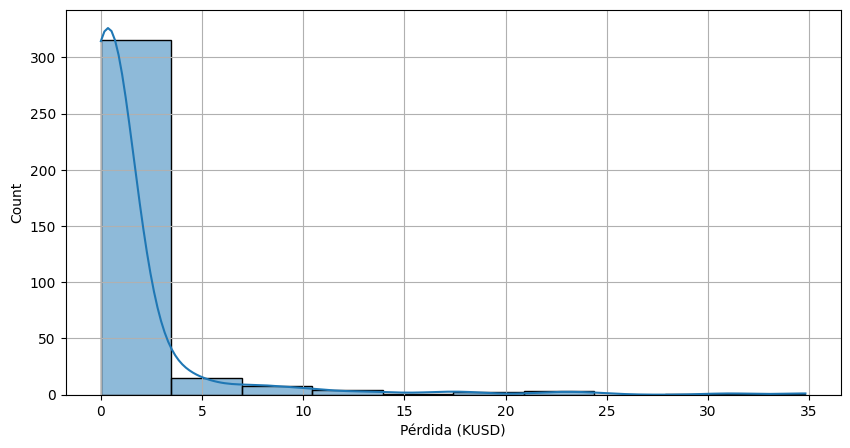

El número de datos por intervalo es:
[315  15   8   4   1   2   3   0   1   1]
Los intervalos inferiores:
[ 0.          3.48221562  6.96443124 10.44664686 13.92886248 17.4110781
 20.89329372 24.37550933 27.85772495 31.33994057]
Los intervalos superiores:
[ 3.48221562  6.96443124 10.44664686 13.92886248 17.4110781  20.89329372
 24.37550933 27.85772495 31.33994057 34.82215619]
La media de los datos observados es: 2.656433058055811
El coeficiente de asimetría es:  5.313307467317224


In [ ]:
ue,sigmae, Case, Kue,dfe=caracterizacion(LDAe)
print("La media de los datos observados es:", ue)
print("El coeficiente de asimetría es: ", Case)

In [ ]:
NDo=len(LDA); NDe=len(LDAe)
uH=(NDo*uo+NDe*ue)/(NDo+NDe)

#4.2 EPV: Valor Esperado de la Varianza
EPV= (NDo*sigmao**2+NDe*sigmae**2)/(NDo+NDe)


#4.3 VHM: Varianza hipotetica de la  Media
VHM=((NDo*uo**2+NDe*ue**2)/(NDo+NDe))-uH**2

#4.4 Factor de Credibilidad
fc= EPV/VHM

#4.5 La credibilidad de la base de datos
Cr=1 -(NDo/(NDo+fc))
print("La credabilidad de la base de Datos Externa es:", Cr)

La credabilidad de la base de Datos Externa es: 0.0011519419670532605


In [ ]:
PEs=Cr*uo+(1-Cr)*ue
print("se conoce como la franquicia de las pérdidas:",PEs)

se conoce como la franquicia de las pérdidas: 5.426495918762939


In [ ]:
uH

np.float64(1606.5454960231393)

Medias de las Pérdidas (uo y ue):

uo (Media de datos observados - Fallas Tecnológicas): 2407.35 KUSD. Representa la pérdida esperada basada en la experiencia histórica de fallas tecnológicas de tu organización.
ue (Media de datos externos - Administración de Procesos): 2.66 KUSD. Representa la pérdida esperada basada en la información externa o de la industria para la administración de procesos.
Existe una diferencia significativa entre la media de las pérdidas por fallas tecnológicas y las de administración de procesos, lo que sugiere que las fallas tecnológicas históricamente han tenido un impacto económico mucho mayor.

Factor de Credibilidad (fc):

El factor de credibilidad (fc) es 0.808. Este valor es un componente clave para determinar la credibilidad de la base de datos externa.
Credibilidad de la Base de Datos Externa (Cr):

La credibilidad de la base de datos externa (Cr) es 0.00115. Este valor es muy bajo, cercano a cero. Esto indica que la experiencia histórica propia de la organización (fallas tecnológicas) tiene una credibilidad predominante en la estimación de las pérdidas futuras. La información externa (administración de procesos) tiene muy poca influencia en el cálculo de la pérdida esperada ajustada, lo que sugiere que los datos externos no son muy representativos o consistentes con la experiencia interna.
Pérdida Esperada Ajustada (PEs):

La pérdida esperada ajustada, o la 'franquicia de las pérdidas' (PEs), es 5.43 KUSD. Dado el bajo factor de credibilidad de los datos externos, esta cifra está fuertemente influenciada por la media de las pérdidas por fallas tecnológicas (uo), pero se ajusta ligeramente hacia la media externa debido al componente (1-Cr)*ue.

In [ ]:
u=np.mean(LDA)
var=np.var(LDA)
sigma=np.std(LDA) # Corrected: Calculate standard deviation of LDA

T2=np.column_stack((u,var,sigma))
df2=pd.DataFrame(T2,columns=['Media','Varianza','Desviacion'])
df2.head(1)

,Media,Varianza,Desviacion
0,2391.636564,1.561393e+06,1249.557302


In [ ]:
from scipy.stats import skew, kurtosis

# Calculate skewness
lda_skew = skew(LDA)

# Calculate kurtosis
lda_kurtosis = kurtosis(LDA)

# Optionally, add to the DataFrame with other metrics
df2_temp = df2.copy()
df2_temp['Asimetria'] = lda_skew
df2_temp['Kurtosis'] = lda_kurtosis

display(df2_temp)

,Media,Varianza,Desviacion,Asimetria,Kurtosis
0,2391.636564,1.561393e+06,1249.557302,0.408298,0.406849


Análisis de las Características de la Distribución Agregada de Pérdidas (LDA)
Media (Promedio de Pérdidas): 2391.64 KUSD. Este valor representa la pérdida esperada promedio de los eventos.

Varianza: 1.56e+06. La varianza es una medida de la dispersión de las pérdidas. Un valor alto indica que las pérdidas están muy distribuidas.

Desviación Estándar: 1249.56 KUSD. Esta es la raíz cuadrada de la varianza y, al estar en las mismas unidades que la media, es más fácil de interpretar. Indica la dispersión típica de los valores de pérdida respecto a la media.

Coeficiente de Asimetría (Skewness): 0.41. Un valor positivo de asimetría (como 0.41) indica que la distribución de pérdidas tiene una cola más larga hacia la derecha. Esto sugiere que, si bien la mayoría de los eventos pueden ser de baja magnitud, existen algunos eventos de pérdida excepcionalmente grandes que tiran el promedio hacia arriba.

Curtosis (Kurtosis): 0.41. Un valor de curtosis de 0.41 (considerando que scipy.stats.kurtosis calcula la curtosis de exceso) sugiere que la distribución tiene colas ligeramente más pesadas y un pico más pronunciado que una distribución normal. Esto implica una probabilidad un poco mayor de ocurrencia de eventos extremos (tanto pérdidas muy pequeñas como muy grandes) en comparación con una distribución normal.